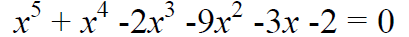
 

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

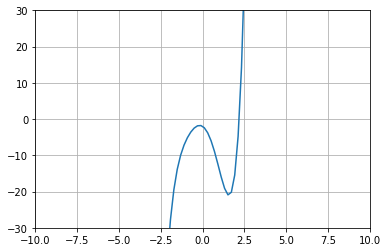

In [11]:
func = lambda x: x**5+x**4-2*x**3-9*x**2-3*x-2
x=np.linspace(-10, 10, 100)
plt.grid()
plt.axis([-10, 10, -30, 30])
plt.plot(x, func(x))

Метод Лагранжа:

In [44]:
def Lagrange(f, z):
    k=0
    F=[]; Ф=[]
    for i in reversed(f):
        if i>0:
            F.insert(0, i)
            k=k+1
        if i<0: break      
    for i in reversed(range(len(f)-k)):
        if f[i]<0: F.insert(0, f[i])
        else: F.insert(0, 0)
    for i in reversed(f):
        if i in F: Ф.insert(0, 0)
        else: Ф.insert(0, i)
    return np.poly1d(F[::-1], variable=z), np.poly1d(Ф[::-1], variable=z)

In [45]:
a_n=[-2, -3, -9, -2, 1, 1]; n=len(a_n)
print(np.poly1d(a_n[::-1]), ' = P(x)')
F=Lagrange(a_n, 'x')[0]
Ф=Lagrange(a_n, 'x')[1]
print(F,' = F(x)\n', Ф, ' = Ф(x)')
def find_alpha(f):
    alpha=1
    while f(alpha)<=0:
        alpha=alpha+1
    return alpha
alpha=find_alpha(F)
print(f'\nα={alpha}>0: F(α) = {F(alpha)} > 0, отже ∀ x* < {alpha}')

   5     4     3     2
1 x + 1 x - 2 x - 9 x - 3 x - 2  = P(x)
   5     4     3     2
1 x + 1 x - 2 x - 9 x - 3 x - 2  = F(x)
  
0  = Ф(x)

α=3>0: F(α) = 178 > 0, отже ∀ x* < 3


Для нижньої межі: зробимо заміну x=1/y і отримаємо наступне рівняння:

In [13]:
print(np.poly1d(a_n, variable='y'))
def cheking(mas, z):
    if mas[0]<0:
        res=[]
        for i in range(len(mas)):
            res.append((-1*mas[i]))
        print('Домножимо на -1:\n', np.poly1d(res, variable=z))
    else: res=mas
    return res
a_nn=cheking(a_n, 'y')
F=Lagrange(a_nn[::-1], 'y')[0]
Ф=Lagrange(a_nn[::-1], 'y')[1]
print(F,' = F(x)\n', Ф, ' = Ф(x)')
alpha1=1/find_alpha(F)
print(f'\nα={1/alpha1}>0: F(α) = {F(1/alpha1)} > 0, отже ∀ x* > {alpha1}')

    5     4     3     2
-2 y - 3 y - 9 y - 2 y + 1 y + 1
Домножимо на -1:
    5     4     3     2
2 y + 3 y + 9 y + 2 y - 1 y - 1
   5     4     3     2
2 y + 3 y + 9 y + 2 y - 1 y - 1  = F(x)
  
0  = Ф(x)

α=1.0>0: F(α) = 14.0 > 0, отже ∀ x* > 1.0


Уточнимо нижню межу від'ємних коренів: зробимо заміну x=-x і отримаємо наступне рівняння:

In [14]:
def sign(mas):
    res=[]
    for i in mas: res.append(i)
    for i in range(len(res)):
        if i%2==1: res[i]=-1*res[i]
    return res
print(np.poly1d(sign(a_n)[::-1]))
a_nn=cheking(sign(a_n)[::-1], 'x')
F=Lagrange(a_nn[::-1], 'x')[0]
Ф=Lagrange(a_nn[::-1], 'x')[1]
print(F,' = F(x)\n', Ф, ' = Ф(x)')
alpha2=-find_alpha(F)
print(f'\nα={-alpha2}>0: F(α) = {F(-alpha2)} > 0, отже ∀ x- > {alpha2}')

    5     4     3     2
-1 x + 1 x + 2 x - 9 x + 3 x - 2
Домножимо на -1:
    5     4     3     2
1 x - 1 x - 2 x + 9 x - 3 x + 2
   5     4     3
1 x - 1 x - 2 x - 3 x  = F(x)
    2
9 x + 2  = Ф(x)

α=3>0: F(α) = 99 > 0, отже ∀ x- > -3


Уточнимо верхню межу від'ємних коренів: зробимо заміну x=-1/y і отримаємо наступне рівняння:

In [15]:
print(np.poly1d(sign(a_n[::-1])[::-1], variable='y'))
a_nn=cheking(sign(a_n[::-1])[::-1], 'y')
F=Lagrange(a_nn[::-1], 'y')[0]
Ф=Lagrange(a_nn[::-1], 'y')[1]
print(F,' = F(x)\n', Ф, ' = Ф(x)')
alpha3=-1/find_alpha(F)
print(f'\nα={-1/alpha3}>0: F(α) = {F(-1/alpha3)} > 0, отже ∀ x- < {alpha3}')

   5     4     3     2
2 y - 3 y + 9 y - 2 y - 1 y + 1
   5     4     2
2 y - 3 y - 2 y - 1 y  = F(x)
    3
9 y + 1  = Ф(x)

α=2.0>0: F(α) = 6.0 > 0, отже ∀ x- < -0.5


Теорема про кільце:

In [16]:
A=abs(max(a_n[1:], key=abs))
B=abs(max(a_n[:(len(a_n)-1)], key=abs))
print(f'A = max(|a_i|) (i=0, 1, ..., 4) = {A}\nB = max(|a_i|) (i=1, 2, ..., 5) = {B}')
left=abs(a_n[0])/(B+abs(a_n[0])); rigth=(abs(a_n[len(a_n)-1])+A)/abs(a_n[len(a_n)-1])
print(f'Всі корені лежать у кільці: {left} =< |x*| =< {rigth}')

A = max(|a_i|) (i=0, 1, ..., 4) = 9
B = max(|a_i|) (i=1, 2, ..., 5) = 9
Всі корені лежать у кільці: 0.18181818181818182 =< |x*| =< 10.0


Теорема про верхню межу додатніх коренів:

In [17]:
a_neg=[]
for i in range(len(a_n)):
    if a_n[i]<0: a_neg.append(a_n[i])
B=abs(max(a_neg, key=abs))
print(f'B = max(|a_i|) (a_i<0; i=0, ..., n) = {B}')
def find(a):
    m=None
    for i in reversed(range(len(a))):
        if a[i]<0:
            m=i
            print(f'm = max(i) (a_i<0; i=0, ..., n) = {i}')        
            return m
            break
    if m is None: print('Рівняння не має додатніх коренів.')

R1=1+math.pow((B/a_n[len(a_n)-1]), 1/(len(a_n)-1-find(a_n)))
print(f'R = {R1} - верхня межа додатніх коренів.')

B = max(|a_i|) (a_i<0; i=0, ..., n) = 9
m = max(i) (a_i<0; i=0, ..., n) = 3
R = 4.0 - верхня межа додатніх коренів.


Для знаходження нижньої межі додатніх коренів зробимо заміну x=1/y і отримаємо наступне рівняння:

In [18]:
print(np.poly1d(a_n, variable='y'))
a_nn=cheking(a_n, 'y')

    5     4     3     2
-2 y - 3 y - 9 y - 2 y + 1 y + 1
Домножимо на -1:
    5     4     3     2
2 y + 3 y + 9 y + 2 y - 1 y - 1


In [19]:
R=1+math.pow((B/a_nn[::-1][len(a_nn)-1]), 1/(len(a_nn)-1-find(a_nn[::-1])))
R2=1/R
print(f'R = {R2} - нижня межа додатніх коренів.')

m = max(i) (a_i<0; i=0, ..., n) = 1
R = 0.4070873392637155 - нижня межа додатніх коренів.


Для знаходження нижньої межі від'ємних коренів зробимо заміну x=-x і отримаємо наступне рівняння:

In [20]:
print(np.poly1d(sign(a_n)[::-1]))
a_nn=cheking(sign(a_n)[::-1], 'x')

    5     4     3     2
-1 x + 1 x + 2 x - 9 x + 3 x - 2
Домножимо на -1:
    5     4     3     2
1 x - 1 x - 2 x + 9 x - 3 x + 2


In [21]:
R=1+math.pow((B/a_nn[::-1][len(a_nn)-1]), 1/(len(a_nn)-1-find(a_nn[::-1])))
R3=-1*R
print(f"R = {R3} - нижня межа від'ємних коренів.")

m = max(i) (a_i<0; i=0, ..., n) = 4
R = -10.0 - нижня межа від'ємних коренів.


Для знаходження верхньої межі від'ємних коренів зробимо заміну x=-1/y і отримаємо наступне рівняння:

In [22]:
print(np.poly1d(sign(a_n[::-1])[::-1], variable='y'))
a_nn=cheking(sign(a_n[::-1])[::-1], 'y')
R=1+math.pow((B/a_nn[::-1][len(a_nn)-1]), 1/(len(a_nn)-1-find(a_nn[::-1])))
R4=-1/R
print(f"R = {R4} - верхня межа від'ємних коренів.")

   5     4     3     2
2 y - 3 y + 9 y - 2 y - 1 y + 1
m = max(i) (a_i<0; i=0, ..., n) = 4
R = -0.18181818181818182 - верхня межа від'ємних коренів.


Теорема Гюа про наявність комплесних коренів:

In [23]:
for i in range(1, len(a_n)-1):
    if a_n[i]**2<a_n[i-1]*a_n[i+1]:
        print(f'Існує таке k, що (a_k)^2<a_(k-1)*a_(k+1), k = {i}: {a_n[i]}^2={pow(a_n[i], 2)}<{a_n[i-1]}*{a_n[i+1]}={a_n[i-1]*a_n[i+1]}, отже рівняння має комплексні корені.')
        break
    if i==len(a_n)-2: 
        print('Рівняння не має комплексних коренів.')    
     

Існує таке k, що (a_k)^2<a_(k-1)*a_(k+1), k = 1: -3^2=9<-2*-9=18, отже рівняння має комплексні корені.


Теорема Штурма:

In [24]:
f=np.poly1d(a_n[::-1])
f0=f
f1=np.poly1d([5, 4, -6, -18, -3])
f2=np.polymul(np.polydiv(f0, f1)[1], -1)
f3=np.polymul(np.polydiv(f1, f2)[1], -1)
f4=np.polymul(np.polydiv(f2, f3)[1], -1)
f5=np.polymul(np.polydiv(f3, f4)[1], -1)
mas=[f2, f3, f4, f5]

In [25]:
print('Загальна формула: f_(i+1)=-[f_(i-1) mod f_i]')
print(f0, ' = f0')
print(f1, ' = f1')
print(mas[0], ' = f2')
print(mas[1], ' = f3')
print(mas[2], ' = f4')
print(mas[3], ' = f5')

Загальна формула: f_(i+1)=-[f_(i-1) mod f_i]
   5     4     3     2
1 x + 1 x - 2 x - 9 x - 3 x - 2  = f0
   4     3     2
5 x + 4 x - 6 x - 18 x - 3  = f1
      3        2
0.96 x + 5.16 x + 1.68 x + 1.88  = f2
        2
-108.2 x - 12.24 x - 41.8  = f3
 
-0.7378 x + 0.07127  = f4
 
43.99  = f5


In [26]:
a=max(left, R2, alpha1)
b=min(alpha, rigth, R1)
c=-max(abs(alpha3), abs(R4))
d=-min(abs(R3), abs(alpha2))
points=[d, c, a, b]
eps=0.00001

In [27]:
df=pd.DataFrame({'f': ['f0', 'f1', 'f2', 'f3', 'f4', 'f5'], f'f({d})':[f'{f0(d)}', f'{f1(d)}', f'{f2(d)}', f'{f3(d)}', f'{f4(d)}', f'{f5(d)}'], f'f({c})':[f'{f0(c)}', f'{f1(c)}', f'{f2(c)}', f'{f3(c)}', f'{f4(c)}', f'{f5(c)}'], f'f({a})':[f'{f0(a)}', f'{f1(a)}', f'{f2(a)}', f'{f3(a)}', f'{f4(a)}', f'{f5(a)}'], f'f({b})':[f'{f0(b)}', f'{f1(b)}', f'{f2(b)}', f'{f3(b)}', f'{f4(b)}', f'{f5(b)}']})
df.set_index('f')

,f(-3),f(-0.5),f(1.0),f(3)
f,,,,
f0,-182,-2.46875,-14.0,178
f1,294,4.3125,-18.0,402
f2,17.36000000000001,2.21,9.680000000000001,79.27999999999999
f3,-978.9062500000006,-62.72786458333337,-162.23958333333346,-1052.343750000001
f4,2.2845787120906027,0.44015135520250886,-0.6665050589303475,-2.1420469444408226
f5,43.98879739757292,43.98879739757292,43.98879739757292,43.98879739757292


In [28]:
def count(num):
    k=0
    for i in range(len(df[f'f({num})'])-1):
        if (float(df[f'f({num})'][i])>0 and float(df[f'f({num})'][i+1])<0) or (float(df[f'f({num})'][i])<0 and float(df[f'f({num})'][i+1])>0):
            k=k+1
    return k

In [29]:
for i in points:
    print(f'ККЗ у точці {i}: ', count(i))
for i in range(len(points)-1):
    print(f'Кількість коренів на проміжку [{points[i]}, {points[i+1]}] = ', count(points[i])-count(points[i+1]))
    if count(points[i])-count(points[i+1])>0:
        a=points[i]
        b=points[i+1]
print(f'отже a = {a}; b = {b}')

ККЗ у точці -3:  3
ККЗ у точці -0.5:  3
ККЗ у точці 1.0:  3
ККЗ у точці 3:  2
Кількість коренів на проміжку [-3, -0.5] =  0
Кількість коренів на проміжку [-0.5, 1.0] =  0
Кількість коренів на проміжку [1.0, 3] =  1
отже a = 1.0; b = 3


In [30]:
def bisection(x, y):
    z=(x+y)/2
    i=0
    while abs(x-y)>eps:
        i=i+1
        z=(x+y)/2
        if func(x)*func(z)<=0: 
            y=z
        else: 
            x=z
        print(f'{i}) a = {x}, b = {y}')
    return (x+y)/2

x_bisection=bisection(a, b)
print(f'Метод бісекції:\nКорінь рівняння з проміжку [{a}, {b}] дорівнює: ', x_bisection)

1) a = 2.0, b = 3
2) a = 2.0, b = 2.5
3) a = 2.0, b = 2.25
4) a = 2.125, b = 2.25
5) a = 2.125, b = 2.1875
6) a = 2.15625, b = 2.1875
7) a = 2.171875, b = 2.1875
8) a = 2.1796875, b = 2.1875
9) a = 2.1796875, b = 2.18359375
10) a = 2.181640625, b = 2.18359375
11) a = 2.181640625, b = 2.1826171875
12) a = 2.18212890625, b = 2.1826171875
13) a = 2.182373046875, b = 2.1826171875
14) a = 2.1824951171875, b = 2.1826171875
15) a = 2.1824951171875, b = 2.18255615234375
16) a = 2.1824951171875, b = 2.182525634765625
17) a = 2.1825103759765625, b = 2.182525634765625
18) a = 2.1825103759765625, b = 2.1825180053710938
Метод бісекції:
Корінь рівняння з проміжку [1.0, 3] дорівнює:  2.182514190673828


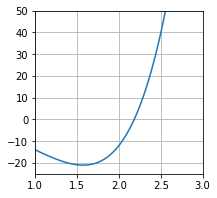

In [51]:
x=np.linspace(1, 3, 100); plt.figure(figsize=(3, 3)); plt.grid()
plt.axis([1, 3, -25, 50]); plt.plot(x, func(x))

In [34]:
def horda(x, y):
    i=0
    z=(x*func(y)-y*func(x))/(func(y)-func(x))
    while abs(func(z))>eps:
        i=i+1
        z=(x*func(y)-y*func(x))/(func(y)-func(x))
        if func(a)>0: y=z
        else: x=z 
        print(f'{i}) a = {x}, b = {y}')
    return (x*func(y)-y*func(x))/(func(y)-func(x))

x_horda=horda(a, b)
print(f'Метод хорд:\nКорінь рівняння з проміжку [{a}, {b}] дорівнює: ', x_horda) 

1) a = 1.1458333333333333, b = 3
2) a = 1.3036835375342746, b = 3
3) a = 1.4671661573831265, b = 3
4) a = 1.6265706586940254, b = 3
5) a = 1.7709650929096163, b = 3
6) a = 1.8917057094582292, b = 3
7) a = 1.985151315660314, b = 3
8) a = 2.052783805036513, b = 3
9) a = 2.099217108895502, b = 3
10) a = 2.1298923303329906, b = 3
11) a = 2.1496272786894677, b = 3
12) a = 2.1621032246108194, b = 3
13) a = 2.1699017705387837, b = 3
14) a = 2.1747419108111767, b = 3
15) a = 2.177732572416224, b = 3
16) a = 2.179575362039127, b = 3
17) a = 2.180708916261741, b = 3
18) a = 2.181405465285968, b = 3
19) a = 2.1818332052977345, b = 3
20) a = 2.182095769355941, b = 3
21) a = 2.1822569023841942, b = 3
22) a = 2.182355773339408, b = 3
23) a = 2.1824164348079997, b = 3
24) a = 2.1824536510557824, b = 3
25) a = 2.182476482700683, b = 3
26) a = 2.1824904892961645, b = 3
27) a = 2.1824990818509025, b = 3
28) a = 2.1825043530394903, b = 3
29) a = 2.182507586686946, b = 3
30) a = 2.1825095703845894, b = 3


In [42]:
d_func=lambda x: 5*x**4+4*x**3-6*x**2-18*x-3
def newton(x, y):
    i=0
    x0=(x+y)/2
    x1=x0-func(x0)/d_func(x0)
    while(abs(func(x1))>eps):
        i=i+1
        print(f'{i}) a = {x0}, b = {x1}')
        x0=(x1+x0)/2
        x1=x0-func(x0)/d_func(x0)
    return x1

print('Метод Ньютона:')
x_newton=newton(a, b)
print(f'Корінь рівняння з проміжку [{a}, {b}] дорівнює: ', x_newton)  

Метод Ньютона:
1) a = 2.0, b = 2.2448979591836733
2) a = 2.1224489795918364, b = 2.1877640584457434
3) a = 2.1551065190187897, b = 2.1835447147335
4) a = 2.1693256168761446, b = 2.1827459581608943
5) a = 2.1760357875185194, b = 2.1825683581930195
6) a = 2.1793020728557693, b = 2.182526316864263
7) a = 2.180914194860016, b = 2.1825160804432917
8) a = 2.181715137651654, b = 2.1825135543774086
9) a = 2.182114346014531, b = 2.1825129269189576
Корінь рівняння з проміжку [1.0, 3] дорівнює:  2.1825127705571954


In [43]:
res_b=func(x_bisection)
res_h=func(x_horda)
res_n=func(x_newton)
print(f'Бісекція: f({x_bisection}) = {res_b}\nХорди: f({x_horda}) = {res_h}\nНьютон: f({x_newton}) = {res_n}')
if min([res_b, res_h, res_n], key=abs)==res_b:
    print(f'Найбільш точне значення отримано методом бісекції.')
elif min([res_b, res_h, res_n], key=abs)==res_h:
    print(f'Найбільш точне значення отримано методом хорд.')
else:
    print(f'Найбільш точне значення отримано методом Ньютона.')

Бісекція: f(2.182514190673828) = 0.0001239061046618417
Хорди: f(2.182512655392301) = -5.3142783738024946e-06
Ньютон: f(2.1825127705571954) = 4.378812933580889e-06
Найбільш точне значення отримано методом Ньютона.
